Q1

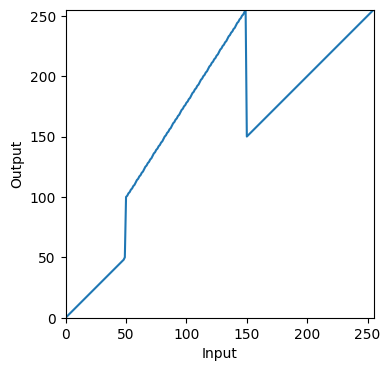

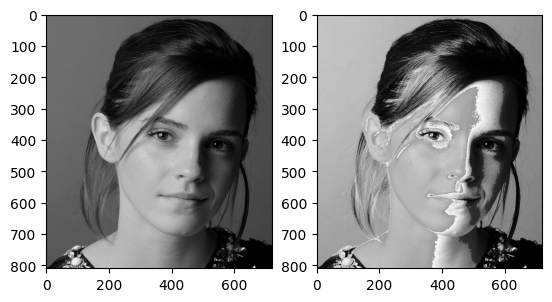

In [59]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0,c[0,1],c[0,0]).astype('uint8')
t2 = np.linspace(c[0,1],c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1],c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1],c[3,1],c[3,0]-c[2,0]).astype('uint8') 
t5 = np.linspace(c[3,1],255,256-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8')

img_transformed = cv.LUT(img,transform)

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_transformed)
plt.show()




Q2

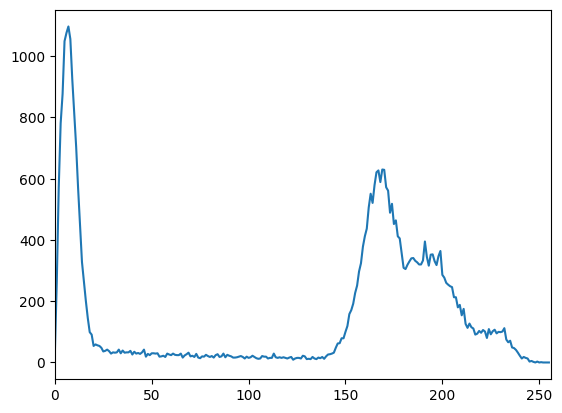

In [60]:
# Histogram of a Grayscale Image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

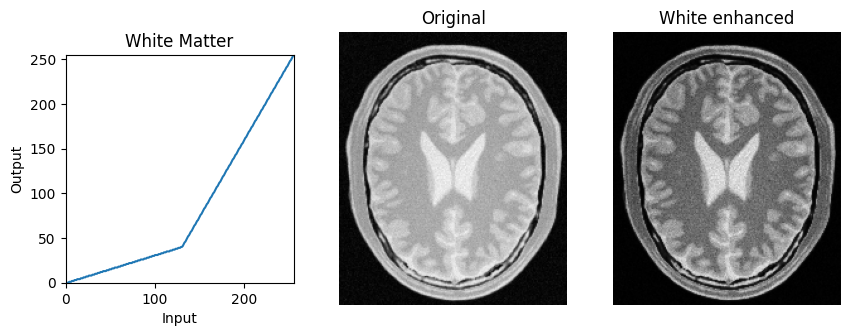

In [8]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



t1 = np.linspace(0,40,130).astype('uint8')
#print(len(t1))

#t2 = np.linspace(40,200,30).astype('uint8')

t3 = np.linspace(40,255,126).astype('uint8')
#print(len(t3))

white_transform = np.concatenate((t1,t3),axis=0).astype('uint8')
img_transformed = cv.LUT(img,white_transform)



fig,ax = plt.subplots(1,3,figsize = (10,6))
ax[0].plot(white_transform), ax[0].set_aspect('equal'),ax[0].set_title('White Matter'), ax[0].set_xlabel('Input'), ax[0].set_ylabel('Output'), ax[0].set_xlim(0,255), ax[0].set_ylim(0,255)



ax[1].imshow(img),ax[1].set_title('Original'),ax[1].axis('off')
ax[2].imshow(img_transformed),ax[2].set_title('White enhanced'),ax[2].axis('off')
plt.show()


Q3

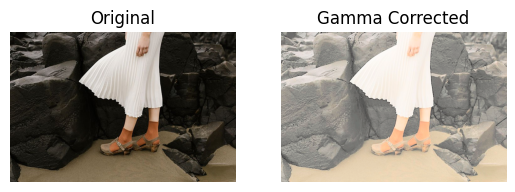

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

img = cv.imread('highlights_and_shadows.jpg')

lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

L = lab[:,:,0]

gamma = 0.2

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma_L = cv.LUT(L, table)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

lab[:, :, 0] = img_gamma_L

img_corrected = cv.cvtColor(lab, cv.COLOR_Lab2RGB)

fig,ax = plt.subplots(1,3)

ax[0].plot(table), ax[0].set_title
ax[1].imshow(img),ax[1].set_title('Original'),ax[1].axis('off')
ax[2].imshow(img_corrected),ax[2].set_title('Gamma Corrected'),ax[2].axis('off')
plt.show()








